# Strategies to deal with unknown class

## Common Parameters

In [38]:
sys.path.append("..") # Adds higher directory to python modules path.
import os
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from utils import *
from helpers import *
from visuals import *
from data.data import *

import pandas as pd
from sklearn.metrics import accuracy_score, balanced_accuracy_score, recall_score
from visuals import plot_confusion_matrix
from tensorflow.keras import utils
from keras_numpy_backend import categorical_crossentropy

%load_ext autoreload
%autoreload 2
%matplotlib inline

data_folder = '../data/isic2019/sampled_full'

model_folder = 'models'
history_folder = 'history'

model_name = 'DenseNet201'
postfix = 'best_balanced_acc'

# How to handle SVG fonts
plt.rcParams['svg.fonttype'] = 'none'

hyperparameter_str = formated_hyperparameter_str(6, 0.001, 0.00001, None, 0.3, 16, 20264, False)
baseline_model = {
    "log": os.path.join("..", history_folder, model_name, hyperparameter_str, "training.csv"),
    "hyperparameters": get_hyperparameters_from_str(hyperparameter_str), 
    "hyperparameters_dir": hyperparameter_str,
    "pred_folder": os.path.join("..", 'test_predict_results_no_unknown', model_name)
} 

hyperparameter_str = formated_hyperparameter_str(6, 0.001, 0.00001, None, 0.3, 16, 20000, True)
class_balanced_20000_model = {
    "log": os.path.join("..", history_folder, model_name, hyperparameter_str, "training.csv"),
    "hyperparameters": get_hyperparameters_from_str(hyperparameter_str), 
    "hyperparameters_dir": hyperparameter_str,
    "pred_folder": os.path.join("..", 'test_predict_results_unknown', model_name)
} 

hyperparameter_str = formated_hyperparameter_str(6, 0.001, 0.00001, None, 0.3, 16, 40000, True)
class_balanced_40000_model = {
    "log": os.path.join("..", history_folder, model_name, hyperparameter_str, "training.csv"),
    "hyperparameters": get_hyperparameters_from_str(hyperparameter_str), 
    "hyperparameters_dir": hyperparameter_str
} 

hyperparameter_str = formated_hyperparameter_str(6, 0.001, 0.00001, None, 0.3, 16, 20000, False)
class_unbalanced_20000_model = {
    "log": os.path.join("..", history_folder, model_name, hyperparameter_str, "training.csv"),
    "hyperparameters": get_hyperparameters_from_str(hyperparameter_str), 
    "hyperparameters_dir": hyperparameter_str
} 

hyperparameter_str = formated_hyperparameter_str(6, 0.001, 0.00001, None, 0.3, 16, 40000, False)
class_unbalanced_40000_model = {
    "log": os.path.join("..", history_folder, model_name, hyperparameter_str, "training.csv"),
    "hyperparameters": get_hyperparameters_from_str(hyperparameter_str), 
    "hyperparameters_dir": hyperparameter_str
} 

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## DenseNet201:
* Feature extract epochs: 6.
* Feature extract learning rate: 0.001000
* Fine tuning learning rate: 0.000010
* Dropout rate: 0.300000
* Lambda(l2): None
* Batch size: 16

# Compute test metrics for baseline

['MEL', 'NV', 'BCC', 'AK', 'BKL', 'DF', 'VASC', 'SCC', 'UNK']
Counter({1: 10300, 0: 3618, 2: 2658, 4: 2099, 3: 694, 7: 502, 6: 202, 5: 191})
Training data has 20264 samples.
'MEL':	3618	(17.85%)
'NV':	10300	(50.83%)
'BCC':	2658	(13.12%)
'AK':	694	(3.42%)
'BKL':	2099	(10.36%)
'DF':	191	(0.94%)
'VASC':	202	(1.00%)
'SCC':	502	(2.48%)
'UNK':	0	(0.00%)
accuracy:  0.592814371257485
balanced_accuracy_score:  0.4844696094918414
macro recall_score:  0.4844696094918414


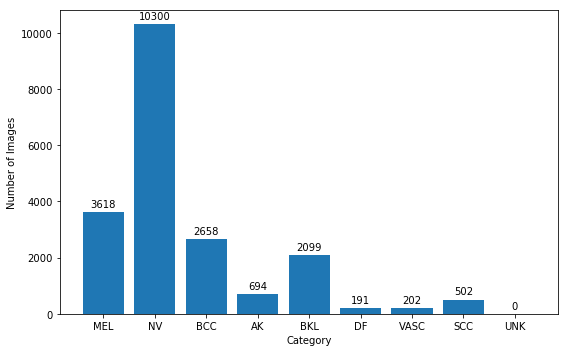

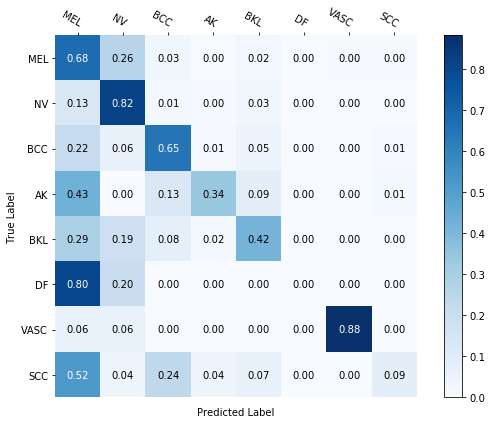

In [39]:
all_category_names, count_per_category = get_count_per_category(data_folder)
total_sample_count = sum(count_per_category.values())
print("Training data has {} samples.".format(total_sample_count))
for i, c in enumerate(all_category_names):
    print("'%s':\t%d\t(%.2f%%)" % (c, count_per_category[i], count_per_category[i]*100/total_sample_count))

plot_class_dist(all_category_names, count_per_category).tight_layout()

# Load predicted results
file_path = os.path.join(
    pred_test_folder, 
    baseline_model["hyperparameters_dir"],
    "{}.csv".format(postfix)
)

df_pred = pd.read_csv(file_path)
df = pd.merge(df_pred, df_test_ground_truth, on='image')
y_true = df['category']
y_pred = df['pred_category']

# Compute Balanced Accuracy
print('accuracy: ', accuracy_score(y_true, y_pred))
print('balanced_accuracy_score: ', balanced_accuracy_score(y_true, y_pred))
print('macro recall_score: ', recall_score(y_true, y_pred, average='macro'))
# Confusion Matrix
plot_confusion_matrix(
    y_true, 
    y_pred, 
    all_category_names, 
    normalize=True,
    figsize=(8, 6)
)
plt.show()

## No class balancing

DenseNet201:
	Train + validation sampled: 20264
	Feature extract epochs: 6
	Feature extract learning rate: 0.001000
	Fine tuning learning rate: 0.000010
	Dropout rate: 0.300000
	Lambda(l2): None
	Batch size: 16
accuracy:  0.7914291330843326
balanced_accuracy_score:  0.588651845442536
macro recall_score:  0.588651845442536


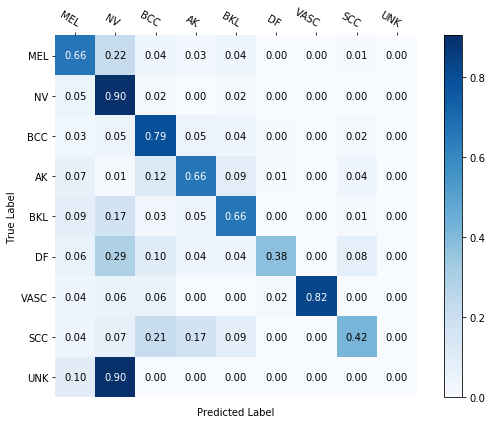

In [25]:
# Load predicted results
file_path = os.path.join(
    pred_test_folder, 
    model_info["hyperparameters_dir"],
    "{}.csv".format(postfix)
)
if not os.path.exists(file_path):
    continue

df_pred = pd.read_csv(file_path)
df = pd.merge(df_pred, df_test_ground_truth, on='image')
y_true = df['category']
y_pred = df['pred_category']
df.to_csv("test.csv")

# Compute Balanced Accuracy
print('accuracy: ', accuracy_score(y_true, y_pred))
print('balanced_accuracy_score: ', balanced_accuracy_score(y_true, y_pred))
print('macro recall_score: ', recall_score(y_true, y_pred, average='macro'))
# Confusion Matrix
plot_confusion_matrix(
    y_true, 
    y_pred, 
    all_category_names, 
    normalize=True,
    figsize=(8, 6)
)
plt.show()

## Class balancing

['MEL', 'NV', 'BCC', 'AK', 'BKL', 'DF', 'VASC', 'SCC', 'UNK']
Counter({2: 2500, 5: 2500, 4: 2500, 0: 2500, 7: 2500, 1: 2500, 3: 2500, 6: 2500})
Training data has 20000 samples.
'MEL':	2500	(12.50%)
'NV':	2500	(12.50%)
'BCC':	2500	(12.50%)
'AK':	2500	(12.50%)
'BKL':	2500	(12.50%)
'DF':	2500	(12.50%)
'VASC':	2500	(12.50%)
'SCC':	2500	(12.50%)
'UNK':	0	(0.00%)


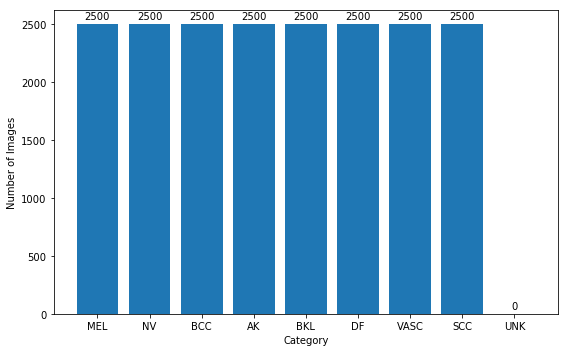

FileNotFoundError: [Errno 2] File ../test_predict_results/DenseNet201/balanced_1-samples_20000-feepochs_6-felr_0.001000-ftlr_0.000010-lambda_None-dropout_0.300000-batch_16/best_balanced_acc.csv does not exist: '../test_predict_results/DenseNet201/balanced_1-samples_20000-feepochs_6-felr_0.001000-ftlr_0.000010-lambda_None-dropout_0.300000-batch_16/best_balanced_acc.csv'

In [40]:
data_folder = '../data/isic2019/sampled_balanced'
all_category_names, count_per_category = get_count_per_category(data_folder)
total_sample_count = sum(count_per_category.values())
print("Training data has {} samples.".format(total_sample_count))
for i, c in enumerate(all_category_names):
    print("'%s':\t%d\t(%.2f%%)" % (c, count_per_category[i], count_per_category[i]*100/total_sample_count))

plot_class_dist(all_category_names, count_per_category).tight_layout()
plt.show()

# Load predicted results
file_path = os.path.join(
    pred_test_folder, 
    class_balanced_20000_model["hyperparameters_dir"],
    "{}.csv".format(postfix)
)

df_pred = pd.read_csv(file_path)
df = pd.merge(df_pred, df_test_ground_truth, on='image')
y_true = df['category']
y_pred = df['pred_category']

# Compute Balanced Accuracy
print('accuracy: ', accuracy_score(y_true, y_pred))
print('balanced_accuracy_score: ', balanced_accuracy_score(y_true, y_pred))
print('macro recall_score: ', recall_score(y_true, y_pred, average='macro'))
# Confusion Matrix
plot_confusion_matrix(
    y_true, 
    y_pred, 
    all_category_names, 
    normalize=True,
    figsize=(8, 6)
)
plt.show()